<a href="https://colab.research.google.com/github/ehdaa12s/Asthma-Model/blob/main/Asthma_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [ ]:

df = pd.read_csv('/content/asthma_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [ ]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,...,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,6229.500000,42.137960,0.493311,0.669732,1.307274,27.244877,0.141722,5.051786,5.022867,7.019012,...,0.158027,2.548564,3.741270,0.596154,0.500418,0.503344,0.503344,0.602425,0.604933,0.051839
std,690.655244,21.606655,0.500060,0.986120,0.898242,7.201628,0.348838,2.903574,2.909980,1.732475,...,0.364842,0.861809,1.303689,0.490770,0.500104,0.500093,0.500093,0.489499,0.488967,0.221749
min,5034.000000,5.000000,0.000000,0.000000,0.000000,15.031803,0.000000,0.001740,0.003031,4.001437,...,0.000000,1.000459,1.500045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5631.750000,23.000000,0.000000,0.000000,1.000000,20.968313,0.000000,2.578333,2.432043,5.498500,...,0.000000,1.824113,2.607489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6229.500000,42.000000,0.000000,0.000000,1.000000,27.052202,0.000000,5.016881,5.115383,6.975839,...,0.000000,2.553244,3.734982,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,6827.250000,61.000000,1.000000,1.000000,2.000000,33.555903,0.000000,7.540234,7.544216,8.526950,...,0.000000,3.292897,4.864121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7425.000000,79.000000,1.000000,3.000000,3.000000,39.985611,1.000000,9.995809,9.999904,9.996235,...,1.000000,3.999719,5.999421,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Dropping non-numeric or irrelevant columns (e.g., 'PatientID', 'DoctorInCharge')
data_cleaned = df.drop(columns=['PatientID', 'DoctorInCharge'])

# Defining features and target variable
X = data_cleaned.drop(columns=['Diagnosis'])
y = data_cleaned['Diagnosis']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Training and evaluating the models
model_results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    report = classification_report(y_test, y_pred, output_dict=True)
    model_results[name] = report

# Displaying classification reports for all models
model_results


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

{'Random Forest': {'0': {'precision': 0.9519832985386222,
   'recall': 1.0,
   'f1-score': 0.9754010695187166,
   'support': 456.0},
  '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 23.0},
  'accuracy': 0.9519832985386222,
  'macro avg': {'precision': 0.4759916492693111,
   'recall': 0.5,
   'f1-score': 0.4877005347593583,
   'support': 479.0},
  'weighted avg': {'precision': 0.9062722006964753,
   'recall': 0.9519832985386222,
   'f1-score': 0.9285655275585277,
   'support': 479.0}},
 'Decision Tree': {'0': {'precision': 0.9537037037037037,
   'recall': 0.9035087719298246,
   'f1-score': 0.927927927927928,
   'support': 456.0},
  '1': {'precision': 0.06382978723404255,
   'recall': 0.13043478260869565,
   'f1-score': 0.0857142857142857,
   'support': 23.0},
  'accuracy': 0.8663883089770354,
  'macro avg': {'precision': 0.5087667454688731,
   'recall': 0.5169717772692601,
   'f1-score': 0.5068211068211068,
   'support': 479.0},
  'weighted avg': {'precision': 0.9109

In [ ]:
df.drop('PatientID',axis=1,inplace=True)

In [ ]:
df.drop('DoctorInCharge',axis=1,inplace=True)

In [ ]:
df.shape

(2392, 28)

In [ ]:
df.keys()

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'PollutionExposure', 'PollenExposure', 'DustExposure', 'PetAllergy',
       'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever',
       'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC',
       'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing',
       'NighttimeSymptoms', 'ExerciseInduced', 'Diagnosis'],
      dtype='object')

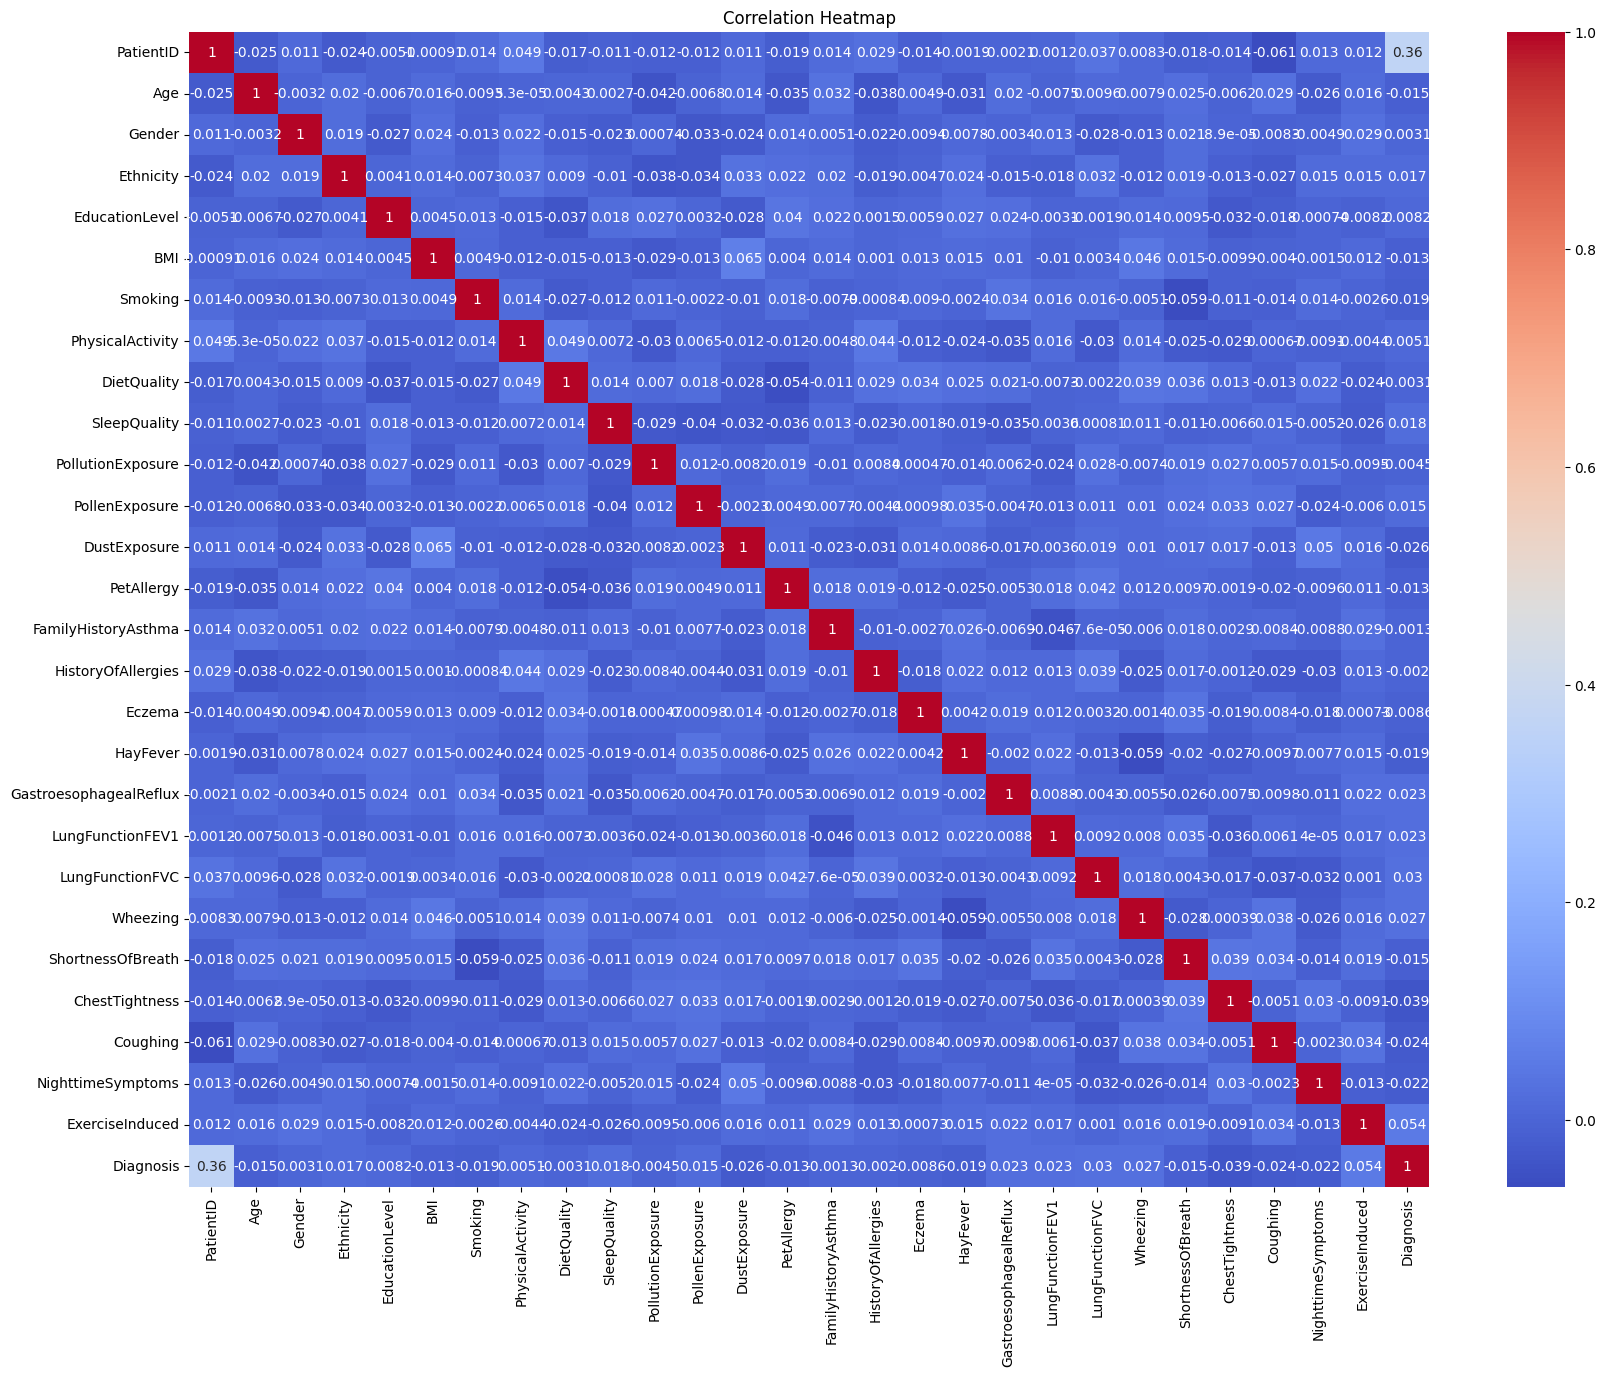

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:




X = df.drop('PatientID', axis=1)
y = df['PatientID']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy}")

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy}")

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy}")


Random Forest Accuracy: 0.0
Decision Tree Accuracy: 0.0
Logistic Regression Accuracy: 0.0
Naive Bayes Accuracy: 0.0


KeyError: "['Target'] not found in axis"

In [ ]:
dt_classifier_model = DecisionTreeClassifier(random_state=42)

start_time = time.time()
dt_classifier_model.fit(x_train, y_train)
training_times['Decision Tree'] = time.time() - start_time

start_time = time.time()
dt_classifier_pred = dt_classifier_model.predict(x_test)
evaluation_times['Decision Tree'] = time.time() - start_time

dt_classifier_mes = mean_squared_error(y_test, dt_classifier_pred)
dt_classifier_accuracy = accuracy_score(y_test, dt_classifier_pred)

dt_classifier_model_scaled = DecisionTreeClassifier(random_state=42)
dt_classifier_model_scaled.fit(x_train_scaled, y_train)
dt_classifier_pred_scaled = dt_classifier_model_scaled.predict(x_test_scaled)
dt_classifier_accuracy_scaled = accuracy_score(y_test, dt_classifier_pred_scaled)

print("Decision Tree Classifier Mean Squared Error:", dt_classifier_mes)
print("Decision Tree Classifier Accuracy:", dt_classifier_accuracy)
print("Scaled Decision Tree Classifier Accuracy:", dt_classifier_accuracy_scaled)

NameError: name 'x_train' is not defined

In [ ]:
logistic_model = LogisticRegression()

start_time = time.time()
logistic_model.fit(x_train, y_train)
training_times['Logistic Regression'] = time.time() - start_time

start_time = time.time()
logistic_pred = logistic_model.predict(x_test)
evaluation_times['Logistic Regression'] = time.time() - start_time

logistic_mes = mean_squared_error(y_test, logistic_pred)
logistic_accuracy = accuracy_score(y_test, logistic_pred)

logistic_model_scaled = LogisticRegression()
logistic_model_scaled.fit(x_train_scaled, y_train)
logistic_pred_scaled = logistic_model_scaled.predict(x_test_scaled)
logistic_accuracy_scaled = accuracy_score(y_test, logistic_pred_scaled)

print("Logistic Regression Mean Squared Error:", logistic_mes)
print("Logistic Regression Accuracy:", logistic_accuracy)
print("Scaled Logistic Regression Accuracy:", logistic_accuracy_scaled)

Logistic Regression Mean Squared Error: 0.24869002525252526
Logistic Regression Accuracy: 0.7513099747474747
Scaled Logistic Regression Accuracy: 0.7513099747474747


In [ ]:
rf_classifier_model = RandomForestClassifier(n_estimators=100, random_state=42)

start_time = time.time()
rf_classifier_model.fit(x_train, y_train)
training_times['Random Forest'] = time.time() - start_time

start_time = time.time()
rf_classifier_pred = rf_classifier_model.predict(x_test)
evaluation_times['Random Forest'] = time.time() - start_time

rf_classifier_mes = mean_squared_error(y_test, rf_classifier_pred)
rf_classifier_accuracy = accuracy_score(y_test, rf_classifier_pred)

rf_classifier_model_scaled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_model_scaled.fit(x_train_scaled, y_train)
rf_classifier_pred_scaled = rf_classifier_model_scaled.predict(x_test_scaled)
rf_classifier_accuracy_scaled = accuracy_score(y_test, rf_classifier_pred_scaled)

print("Random Forest Classifier Mean Squared Error:", rf_classifier_mes)
print("Random Forest Classifier Accuracy:", rf_classifier_accuracy)
print("Scaled Random Forest Classifier Accuracy:", rf_classifier_accuracy_scaled)

Random Forest Classifier Mean Squared Error: 0.24869002525252526
Random Forest Classifier Accuracy: 0.7513099747474747
Scaled Random Forest Classifier Accuracy: 0.7513099747474747


In [ ]:
nb_classifier_model = GaussianNB()

start_time = time.time()
nb_classifier_model.fit(x_train, y_train)
training_times['Naive Bayes'] = time.time() - start_time

start_time = time.time()
nb_classifier_pred = nb_classifier_model.predict(x_test)
evaluation_times['Naive Bayes'] = time.time() - start_time

nb_classifier_mes = mean_squared_error(y_test, nb_classifier_pred)
nb_classifier_accuracy = accuracy_score(y_test, nb_classifier_pred)

nb_classifier_model_scaled = GaussianNB()
nb_classifier_model_scaled.fit(x_train_scaled, y_train)
nb_classifier_pred_scaled = nb_classifier_model_scaled.predict(x_test_scaled)
nb_classifier_accuracy_scaled = accuracy_score(y_test, nb_classifier_pred_scaled)

print("Naive BayesMean Squared Error:", nb_classifier_mes)
print("Naive Bayes Accuracy:", nb_classifier_accuracy)
print("Scaled Naive Bayes Accuracy:", nb_classifier_accuracy_scaled)


Naive BayesMean Squared Error: 0.24869002525252526
Naive Bayes Accuracy: 0.7513099747474747
Scaled Naive Bayes Accuracy: 0.7513099747474747


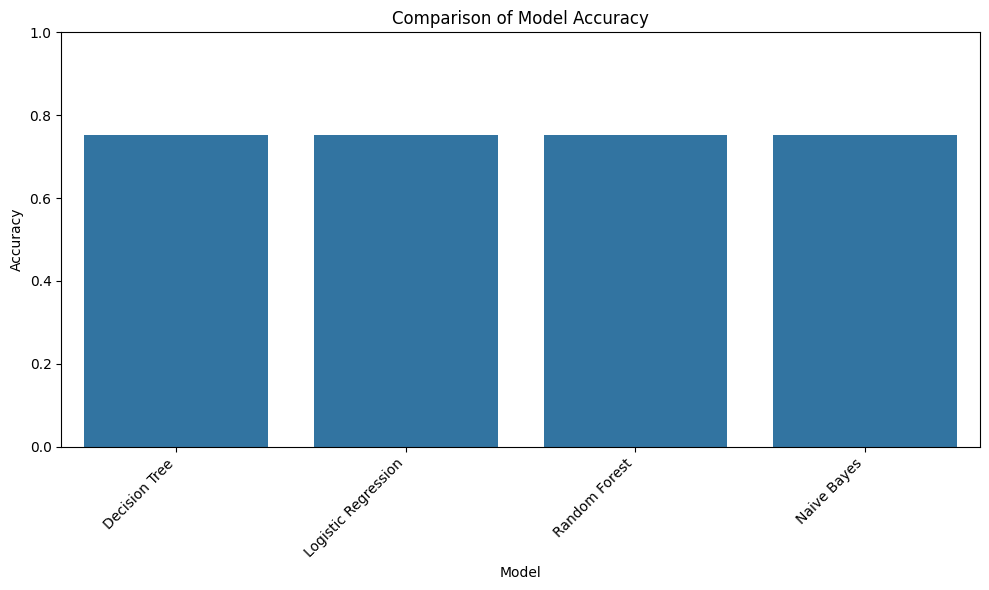

In [ ]:
model_accuracy = {
    'Decision Tree': dt_classifier_accuracy,
    'Logistic Regression': logistic_accuracy,
    'Random Forest': rf_classifier_accuracy,
    'Naive Bayes': nb_classifier_accuracy
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracy.keys()), y=list(model_accuracy.values()))
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

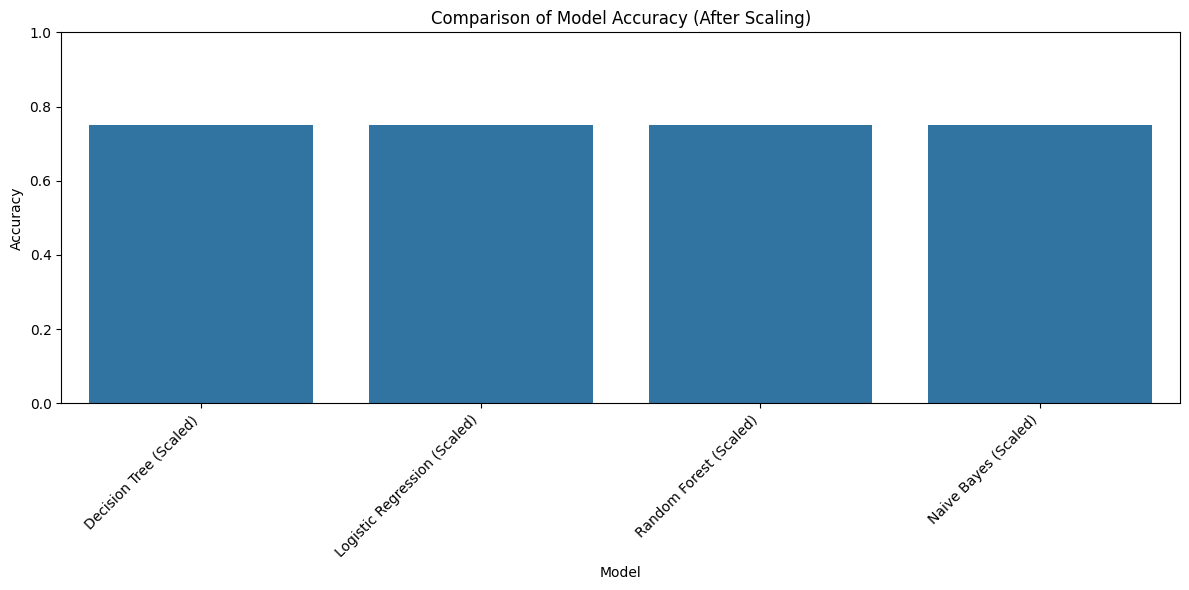

In [ ]:
model_accuracy_scaled = {
    'Decision Tree (Scaled)': dt_classifier_accuracy_scaled,
    'Logistic Regression (Scaled)': logistic_accuracy_scaled,
    'Random Forest (Scaled)': rf_classifier_accuracy_scaled,
    'Naive Bayes (Scaled)': nb_classifier_accuracy_scaled
}

plt.figure(figsize=(12, 6))
sns.barplot(x=list(model_accuracy_scaled.keys()), y=list(model_accuracy_scaled.values()))
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy (After Scaling)')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
dt_scores = cross_val_score(dt_classifier_model, x, y, cv=5)
print("Decision Tree Classifier Cross-Validation Accuracy:", dt_scores.mean())

logistic_scores = cross_val_score(logistic_model, x, y, cv=5)
print("Logistic Regression Cross-Validation Accuracy:", logistic_scores.mean())

rf_scores = cross_val_score(rf_classifier_model, x, y, cv=5)
print("Random Forest Classifier Cross-Validation Accuracy:", rf_scores.mean())

nb_scores = cross_val_score(nb_classifier_model, x, y, cv=5)
print("Naive Bayes Cross-Validation Accuracy:", nb_scores.mean())

Decision Tree Classifier Cross-Validation Accuracy: 0.75
Logistic Regression Cross-Validation Accuracy: 0.75
Random Forest Classifier Cross-Validation Accuracy: 0.75
Naive Bayes Cross-Validation Accuracy: 0.75


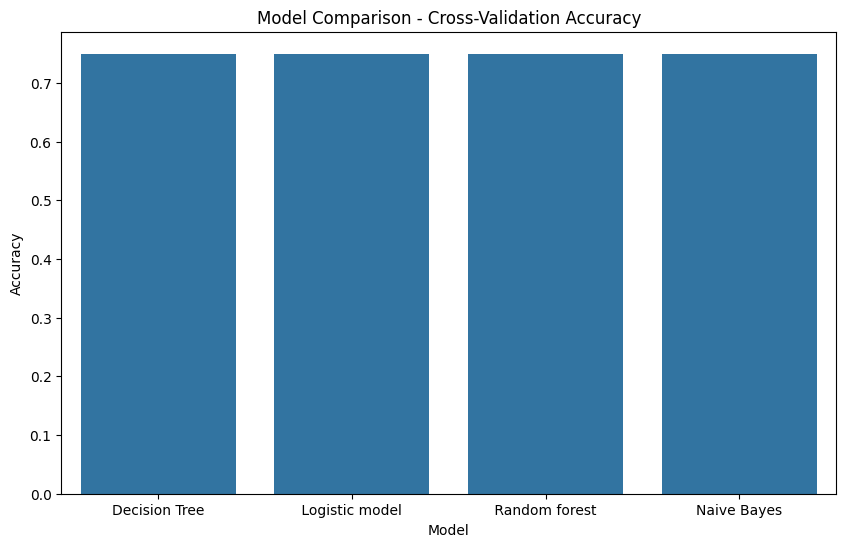

In [ ]:
models = ['Decision Tree' , ' Logistic model ' , ' Random forest ', 'Naive Bayes']
accuracies = [dt_scores.mean(), logistic_scores.mean(), rf_scores.mean(), nb_scores.mean()]
comparison_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=comparison_df)
plt.title('Model Comparison - Cross-Validation Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

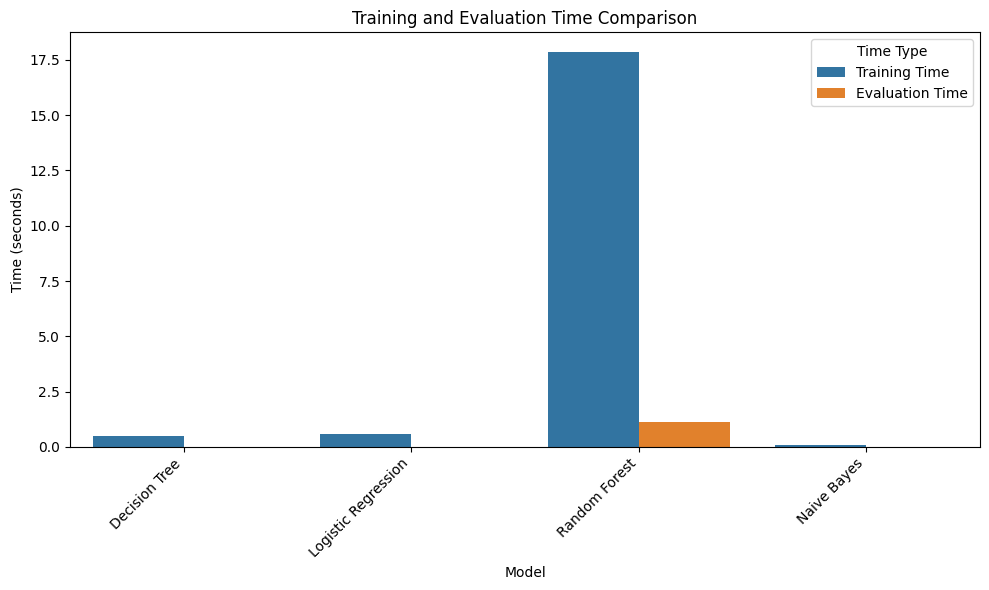

In [ ]:
time_df = pd.DataFrame({
    'Model': list(training_times.keys()),
    'Training Time': list(training_times.values()),
    'Evaluation Time': list(evaluation_times.values())
})

time_df_melted = pd.melt(time_df, id_vars=['Model'], var_name='Time Type', value_name='Time (seconds)')

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Time (seconds)', hue='Time Type', data=time_df_melted)
plt.title('Training and Evaluation Time Comparison')
plt.xlabel('Model')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()